<br>
<center style="color:#180090; font-weight: bold; font-size: 3em">Esercitazione 6</center><br>
<center style="color:#555555; font-size: 2em; margin-bottom: 0.2cm;">Francesco Righini</center>
<center style="color:#555555; font-size: 1.5em">(931984)</center>

<div style="color:#ff0000; font-size: 0.5cm; font-weight:bold;">
    Scrivere tutto: testi e soluzioni
</div>

In [1]:
# importazione librerie
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
params = {'legend.fontsize': 'x-large', 'figure.figsize': (10, 6), 'axes.labelsize': 'x-large', 'axes.titlesize':'xx-large', 'xtick.labelsize':'x-large', 'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

<div style="color:#180090; font-size: 0.9cm; padding-top: 1em; font-weight:bold;">Esercizio 1</div>

<div style="color:#333333; font-size: 0.43cm; padding: 1em; background-color:#F5F5F5">
L'hamiltoniana per un modello di Ising unidimensionale di $N$ spin con interazioni a primi vicini e condizioni periodiche al contorno è

$$
H = -J\sum_{i=1}^N s_i s_{i+1} -\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

dove si $\{ s_i \}_{i=1,N}$ sono gli spin che possono assumere i valori discreti $\{-1;1\}$ e $\mu_B=1$ e $k_B=1$.
</div>

<div style="color:#555555; font-size: 0.7cm; font-weight:bold;">Punto 1</div>

<div style="color:#333333; font-size: 0.43cm; padding: 1em; background-color:#F5F5F5">
Implementare l'algoritmo di Metropolis e di Gibbs per simulare l'evoluzione temporale di un modello di Ising unidimensionale di $N=50$ spin.

Calcolare, al variare della temperatura nell'intervallo $[0.5,2.0]$, l'energia interna per spin, la capacità termica, la magnetizzazione e la suscettività.
    
Utilizzare i parametri $J=1$ e $h=\{0,0.02\}$ e confrontare i risultati con le previsioni teoriche calcolate analiticamente a partire dalla dalla funzione di partizione.
</div>

<div style="font-size: 0.43cm;">
Le simulazioni sono state fatte su sistemi di spin lasciati equilibrare per $3\times10^5$ steps prima di prendere le misure, suddivise in $200$ blocchi da $3000$ step ognuno. Si è esplorata la gamma di temperature $[0.5,2.0]$ per passi di $0.1$.
    
In questa prima simulazione, con $h=0$, non c'è una direzione privilegiata e le configurazioni a minima energia sono i due stati in cui gli spin sono tutti $+1$ oppure tutti $-1$.
</div>

In [2]:
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th

func = [[],[],[],[]]


parametri = ["ene","heat","mag","chi"]
titolo = ["Energia", "Capacità termica", "Magnetizzazione", "Suscettività"]

def disegna_funzioni_insieme(h_label):
    
    fig, axs = plt.subplots(2,2,figsize=(14,15))
    
    h = h_label/100
    b = beta
    
       
    func[0] = -J*( th + ch*thN )/( 1 + thN ) #energia
    func[1] = ((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2) #capacità termica
    l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
    l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
    Z = l1**Ns + l2**Ns 
    func[2] = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z) #magnetizzazione
    func[3] = beta*np.exp(2*beta*J)*(1-thN)/(1+thN) #suscettività
    
    metodo_label = ["Metropolis","Gibbs"]
    metodi = ["metro","gibbs"]
    colori = ["red","blue"]
    
    for k in range (len(parametri)):
        ax = axs.flat[k]

        for i in range(2):
            temp, valori, errori = np.loadtxt("results/out."+parametri[k]+"."+metodi[i]+".h"+str(h_label), usecols=(0,1,2), delimiter=' ', unpack='true')
            ax.errorbar(temp, valori, yerr=errori, label="simulazione con "+metodo_label[i] ,color = colori[i], alpha=0.7)
        ax.plot(T,func[k],label="analitico",color="orange")
        ax.set(xlabel=r'Temperatura', ylabel=titolo[k], title=titolo[k]+r" $(h="+str(h)+r")$")
        ax.grid()
        ax.legend()
    return

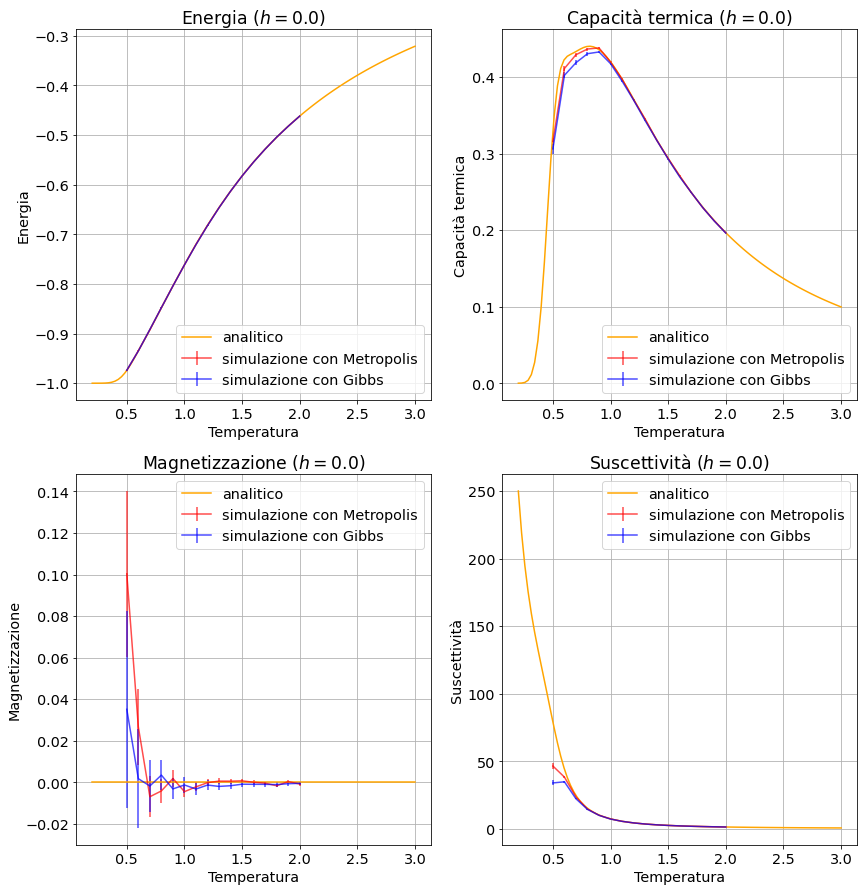

In [3]:
disegna_funzioni_insieme(0)

<div style="font-size: 0.43cm;">
L'energia interna misurata dalle simulazioni, generate sia con algoritmo di Metropolis che di Gibbs, si adagia perfettamente sulla previsione teorica su tutto il range di temperatura esaminato.
<br><br>
La capacità termica misurata dalle simulazioni eseguite con Metropolis si adagia bene sulla curva teorica, mentre le misure delle simulazioni eseguite con Gibbs sono in accordo sotto $T=0.4$ e sopra $T=0.9$.
<br><br>
La magnetizzazione "impazzisce" a basse temperature (circa da $T=1$). Questo è dovuto al fatto che in questo caso ($h=0$) le due soluzioni ad energia minima hanno magnetizzazione opposta. A bassa temperatura stati eccitati sono poco probabili, mentre sono altamente probabili stati a bassa energia. Ad una piccola perturbazione da una situazione all'equilibrio, il sistema potrebbe rispondere "facendo ribaltare" tutti gli spin e portandosi all'altra configurazione di equilibrio.
<br><br>
La suscettività è ben simulata da Metropolis e Gibbs, solo per temperature superiori a $T=0.7$. Per temperature inferiori, prima Gibbs e poi Metropolis, si staccano dalla curva di aspettazione. Aumentare numero di blocchi tempo di equilibrazione (è già altissimo!) non è servito.
</div>

<div style="font-size: 0.43cm;">
In questa seconda simulazione si pone $h=0.02$, introducento quindi una una direzione privilegiata ed eliminando la degenerazione delle configurazioni a minima energia: ora il ground state è lo stato (uno solo) in cui gli spin sono tutti $+1$ (paralleli e allineati col campo esterno).
</div>

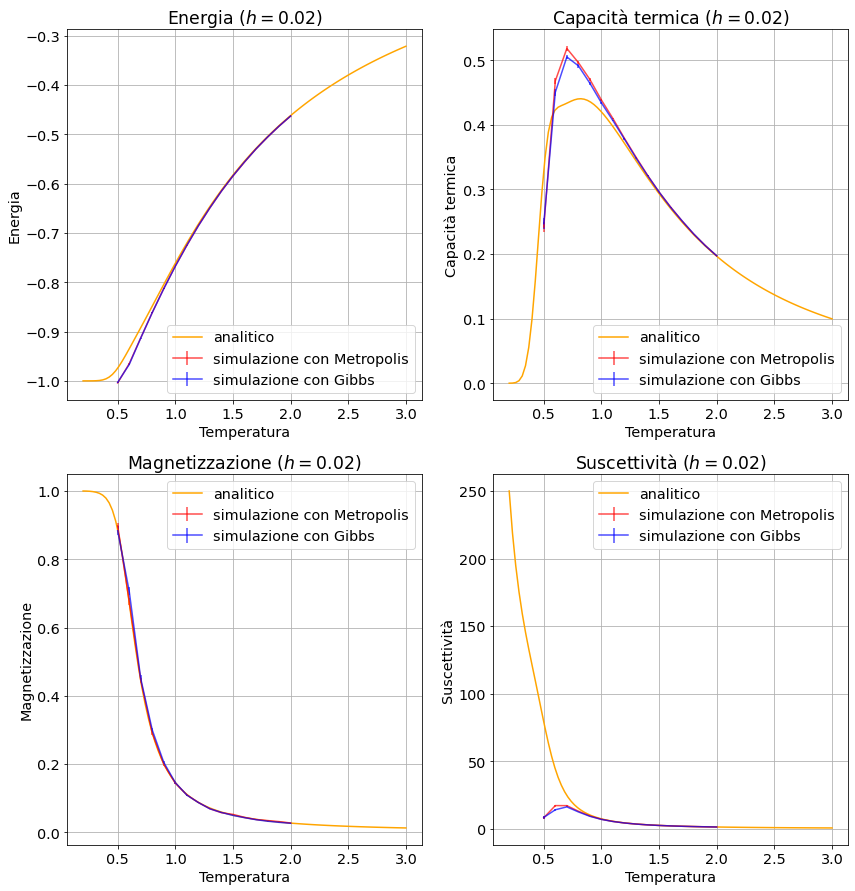

In [4]:
disegna_funzioni_insieme(2)

<div style="font-size: 0.43cm;">
La curva teorica per l'energia non è calcolata per il caso in cui $h=0.02$, quindi è giusto che i risultati non siano compatibili. A bassa temperatura prevalgono gli stati a minor energia: la configurazione di ground state ha energia media per particella pari a $-h$ e corrisponde al caso in cui tutti gli spin sono paralleli e allineati col campo esterno. L'introduzione del termine di campo esterno rompe la simmetria "su/giù" e quindi rompe la degenerazione del ground state. A temperature alte, invece, il termine dominante è quello di interazione tra spin, quindi l'energia media per particella si avvicina a quella calcolata nel caso di assenza di campo esterno.
<br><br>
Anche la curva teorica per la capacità termica riportata nelle figure non è quella corrispondente al caso $h=0.02$. Può essere interessante tenerla, però, come paragone. Dato che la capacità termica in funzione della temperatura è proporzionale alla derivata dell'energia in funzione della temperatura, e dato che l'energia parte più in basso del caso precedente a basse $T$ e deve arrivare più o meno agli stessi valori ad alte $T$, è giusto che la capacità termica sia maggiore di quella del caso precedente.
<br><br>
Grazie al fatto che il ground state sia uno solo, a basse temperature la magnetizzazione non oscilla più come nel caso precedente, ma si porta verso il valore $1$: tutti gli spin allineati con il campo esterno ($h>0$). A temperature alte si trova comunque lo stato "disordinato", con spin orientati casualmente e quindi magnetizzazione nulla.
<br><br>
Anche la curva teorica per la susettività non corrisponde al caso $h=0.02$. Si vede comunque che ad alte temperature le misure effettuate sulle due simulazioni con $h=0.02$ si adagiano sulla curva teorica del caso $h=0$.
</div>